### Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from seaborn_qqplot import pplot

%matplotlib inline

warnings.filterwarnings('ignore')

### Importing dataset

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

#### Checking loaded data object

##### Features of the dataset

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

##### Description of the dataset

In [5]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

### DataFrame Creation

In [6]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)

##### Addition of target feature in dataframe

In [7]:
df['Price'] = boston.target

In [8]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### Information Regarding Dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### Statistical Summary of the features

In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Checking Missing Values

In [11]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

#### Checking Datatypes of Features

In [12]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
Price      float64
dtype: object

## Exploratory Data Analysis

#### Distribution of the Features

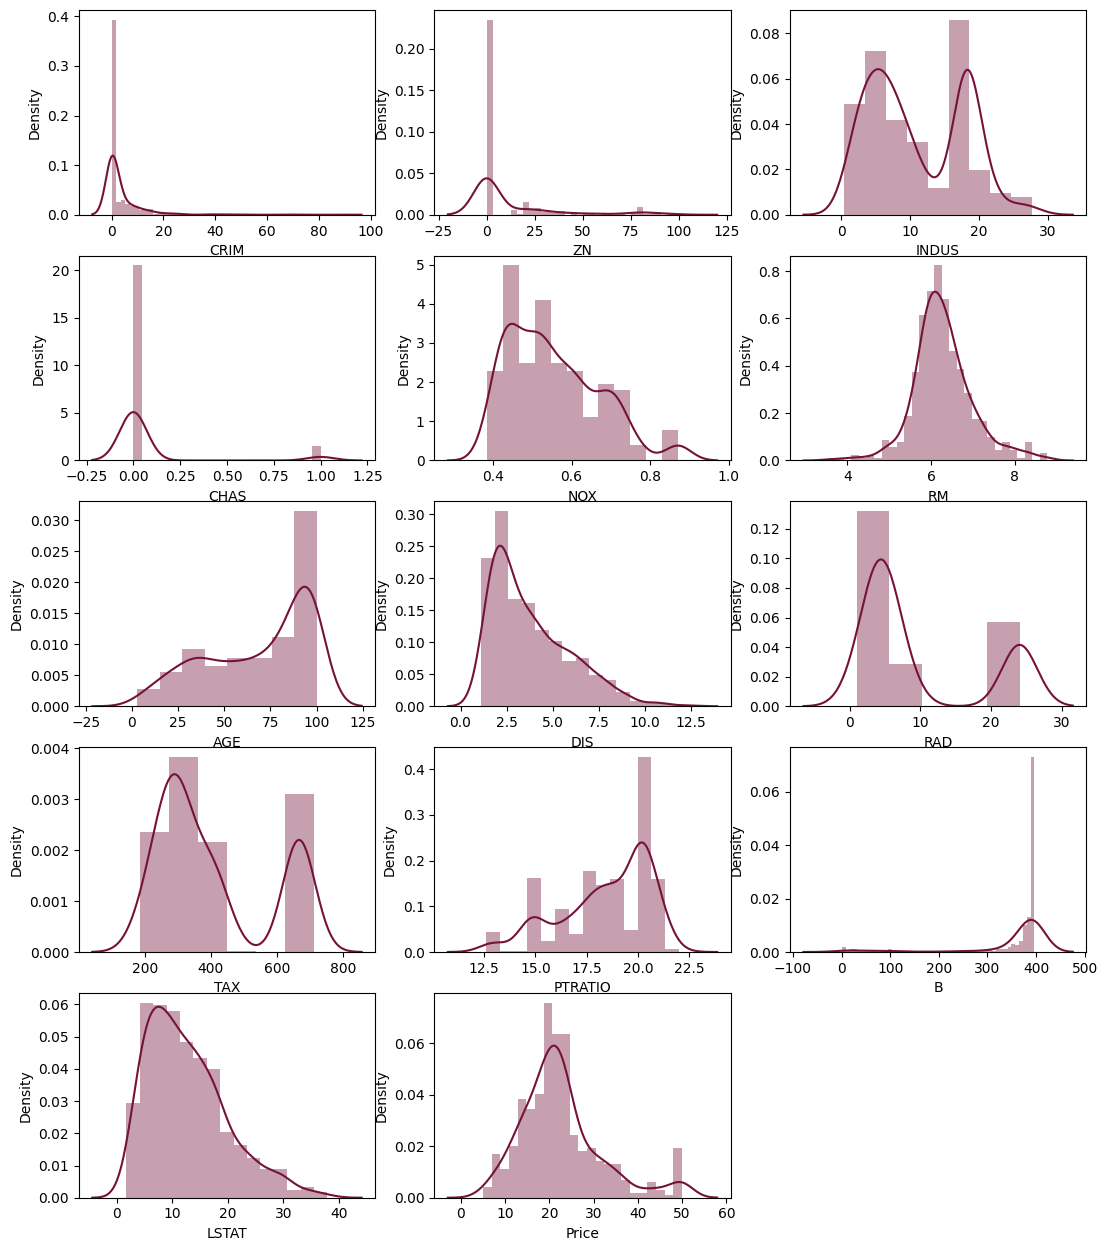

In [13]:
pos=1
fig = plt.figure(figsize=(13,25))

for i in df.columns:
    ax = fig.add_subplot(8,3,pos)
    pos = pos + 1
    sns.distplot(df[i], ax=ax, color="#751238")

#### Correlation Among Numerical Features

In [14]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
PTRATIO,0.289946,-0.391679,0.383248,-0.121515,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787
B,-0.385064,0.175520,-0.356977,0.048788,-0.380051,0.128069,-0.273534,0.291512,-0.444413,-0.441808,-0.177383,1.000000,-0.366087,0.333461
LSTAT,0.455621,-0.412995,0.603800,-0.053929,0.590879,-0.613808,0.602339,-0.496996,0.488676,0.543993,0.374044,-0.366087,1.000000,-0.737663


#### HeatMap to visualize correlation

<AxesSubplot:>

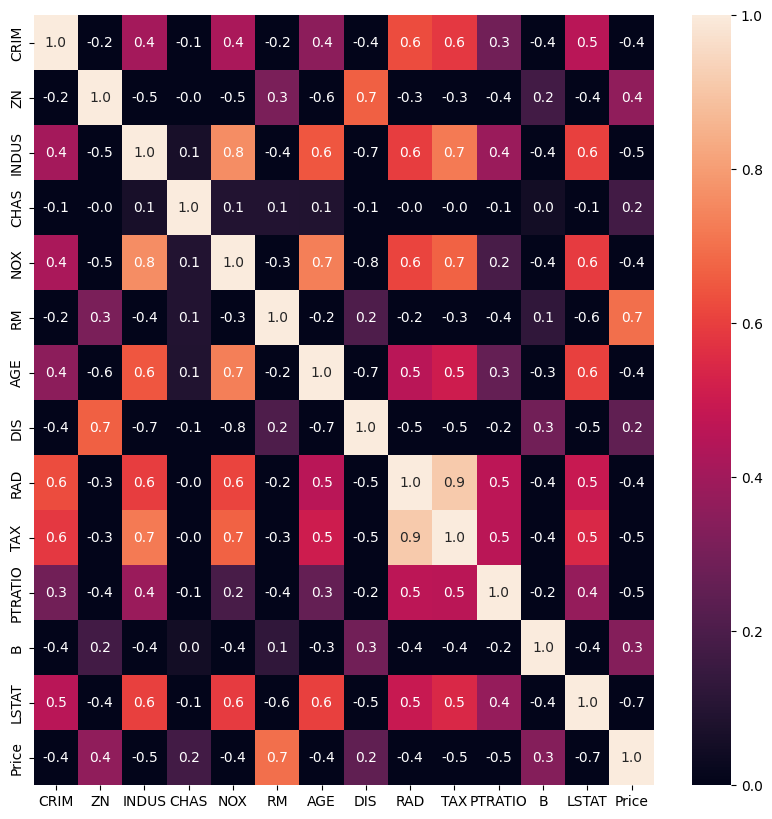

In [15]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), vmin=0, annot=True,fmt='.1f')

### Creation of pair-plot with all the features

<Figure size 900x900 with 0 Axes>

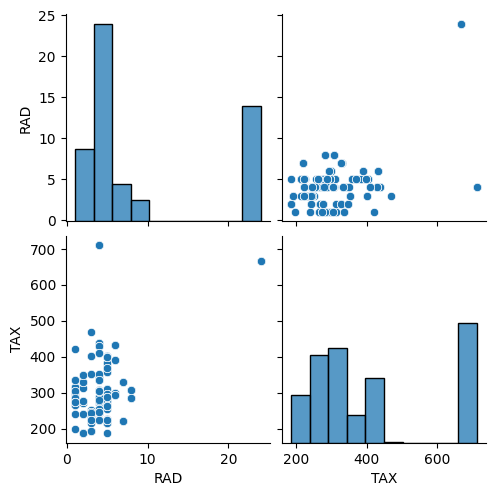

In [16]:
plt.figure(figsize=(9, 9))
sns.pairplot(df , vars=["RAD", "TAX"])

In [17]:
df['TAX'].corr(df['RAD'])

0.9102281885331849

<b>OBSERVATION : </b> Feature TAX & RAD are highly correlated.

### Calculation of VIF (Variance Inflation Factor) value for the features

VIF = 1/(1-r2)

*Keeping one feature at a time as dependent & others as independent.*

#### Importing the Library

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#### Features & their respective VIF score

In [20]:
#Creation of VIF Score method for given dataset
def VIFscore(dataset):
    temp=[]
    for i in df.columns:
        X = np.array(df.drop(i,axis=1))
        y = np.array(df[i])
        lr = LinearRegression()
        lr.fit(X,y)
        y_pred = lr.predict(X)
        r2 = r2_score(y,y_pred)
        vif = 1/(1-r2)
        temp.append((i,vif))
    return temp

In [21]:
VIFscore(df)

[('CRIM', 1.831536683713473),
 ('ZN', 2.352185889014947),
 ('INDUS', 3.9925031533175335),
 ('CHAS', 1.0952226687688211),
 ('NOX', 4.58692024225555),
 ('RM', 2.2603743566681325),
 ('AGE', 3.100842819545981),
 ('DIS', 4.3960072515073945),
 ('RAD', 7.808198432681462),
 ('TAX', 9.205542091810146),
 ('PTRATIO', 1.993015656553282),
 ('B', 1.3814629538442607),
 ('LSTAT', 3.5815848036702103),
 ('Price', 3.855684268833824)]

 <b>OBSERVATION : </b> RAD & TAX are highly correlated hence leads to multicollinearity in the dataset.
 Hence we need to drop the column

<b>RESULT : </b> We're dropping RAD since it's correlation wrt Price is -0.4 whereas TAX has -0.5.
Hence tax is highly correlated with target feature.

In [22]:
df.drop(columns=['RAD'], inplace=True)

In [23]:
VIFscore(df)

[('CRIM', 1.679218009646556),
 ('ZN', 2.310513229090843),
 ('INDUS', 3.6892806919112746),
 ('CHAS', 1.0889011514418125),
 ('NOX', 4.441583206372164),
 ('RM', 2.250603560344789),
 ('AGE', 3.0835425023527283),
 ('DIS', 4.385150316922098),
 ('TAX', 3.41749811856695),
 ('PTRATIO', 1.8789370351875438),
 ('B', 1.3672470111320019),
 ('LSTAT', 3.5319614193394617),
 ('Price', 3.695840343820758)]

<b>OBSERVATION : </b> Now features doesn't look strongly correlated with threshold of 5. Hence we can proceed now.

### Scatter Plot using crime & price

Text(0, 0.5, 'Price')

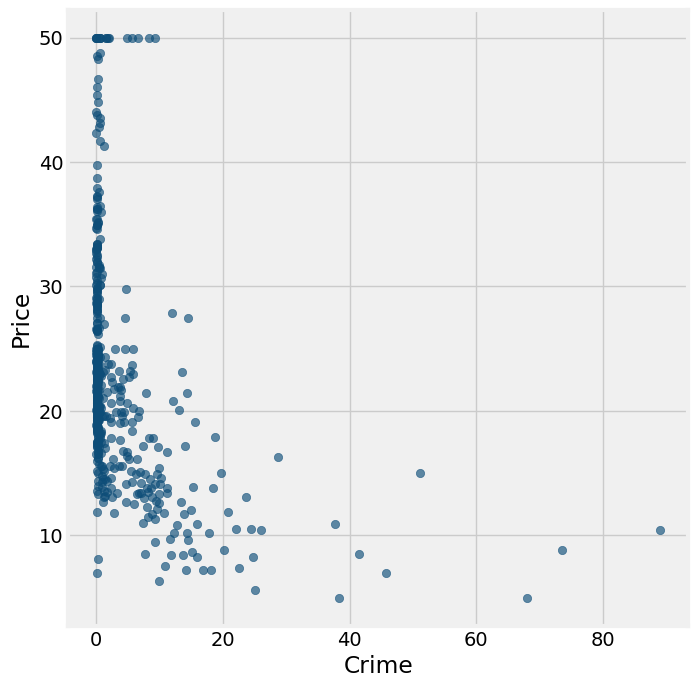

In [24]:
plt.figure(figsize=(8, 8))
plt.style.use("fivethirtyeight")
plt.scatter(df['CRIM'], df['Price'], color="#0d4d78", alpha=0.65)
plt.xlabel('Crime')
plt.ylabel("Price")

### Scatter Plot using LSTAT & Price

Text(0, 0.5, 'Price')

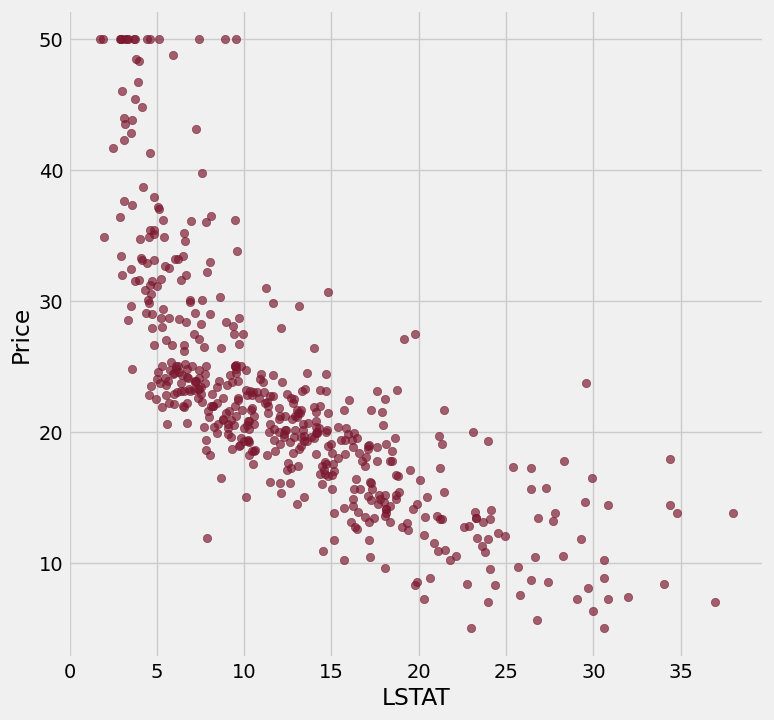

In [25]:
plt.figure(figsize=(8, 8))
plt.style.use("fivethirtyeight")
plt.scatter(df['LSTAT'], df['Price'], color="#7a172e", alpha=0.68)
plt.xlabel('LSTAT')
plt.ylabel("Price")

#### Creation of Independent & Dependent Features

In [26]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

### Splitting the data into train-test sets

#### Importing the library

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [29]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
478,10.23300,0.0,18.10,0.0,0.614,6.185,96.7,2.1705,666.0,20.2,379.70,18.03
26,0.67191,0.0,8.14,0.0,0.538,5.813,90.3,4.6820,307.0,21.0,376.88,14.81
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,311.0,15.2,396.90,19.15
492,0.11132,0.0,27.74,0.0,0.609,5.983,83.5,2.1099,711.0,20.1,396.90,13.35
108,0.12802,0.0,8.56,0.0,0.520,6.474,97.1,2.4329,384.0,20.9,395.24,12.27
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,666.0,20.2,109.85,23.27


In [30]:
X_train.shape

(339, 12)

In [31]:
X_test.shape

(167, 12)

### Dataset Standardization

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Training Using Linear Regression

In [35]:
regression = LinearRegression()
regression

LinearRegression()

In [36]:
regression.fit(X_train, Y_train)

LinearRegression()

#### Coefficients & Intercept of Linear Regression

In [37]:
regression.coef_

array([-0.6948544 ,  0.67118376,  0.01739022,  0.9728182 , -1.66523468,
        2.96696856, -0.47536504, -2.98774912,  0.34037056, -1.88277704,
        0.98254063, -3.86612274])

In [38]:
regression.intercept_

22.970796460176988

#### Prediction for the test-data

In [39]:
reg_pred = regression.predict(X_test)

In [40]:
reg_pred

array([28.40172358, 36.47498509, 19.09018005, 25.6431586 , 18.05662783,
       23.71787099, 17.4157474 , 15.28841066, 21.92120584, 21.19376141,
       24.44674664, 18.0996987 , -5.7420562 , 22.48235758, 18.94505605,
       25.40706761, 18.82467685,  5.17605812, 39.72248792, 16.90995649,
       27.08898935, 29.63203528, 11.26322145, 24.63025306, 17.36365246,
       15.05212813, 23.86305287, 14.2366082 , 22.44978015, 19.95775594,
       21.88213493, 25.05448432, 25.08659743, 17.5857199 , 15.66578508,
       18.09798088, 30.87356526, 19.55667496, 24.21363187, 25.1613869 ,
       14.58656191, 30.34309596, 41.33930137, 18.24351358, 27.41648972,
       16.3814636 , 14.09447397, 26.38836234, 19.33680825, 30.7940503 ,
       20.86419861, 33.01635263, 15.9208046 , 27.00881044, 38.6614825 ,
       22.14959437, 18.15201927, 32.30366396, 24.80542817, 12.46746558,
       21.74228885, 29.65302676, 31.1015131 , 16.91361104, 22.24441455,
       16.65742999, 19.66383382, 26.12182208, 30.74474695, 11.44

#### Plotting predicted value vs real values

<AxesSubplot:title={'center':'Linear Regression'}, xlabel='Predicted Values', ylabel='Observaed Values'>

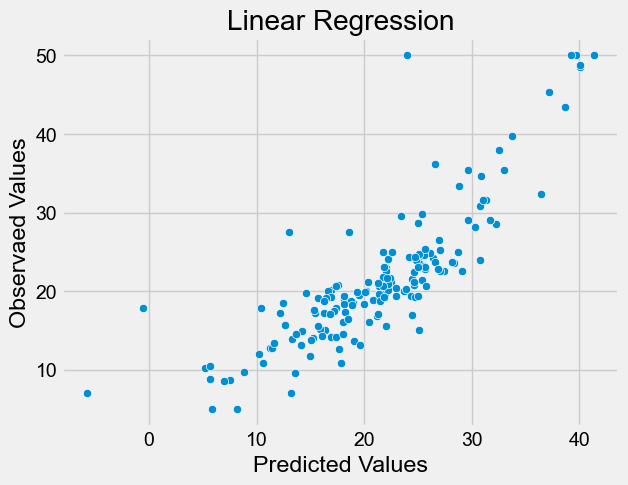

In [41]:
plt.xlabel("Predicted Values")
plt.ylabel("Observaed Values")
plt.title("Linear Regression")
sns.set_style("dark")
sns.scatterplot(x = reg_pred, y=Y_test, palette="plasma", ci=25)

<b>Result : </b>Almost Linear Relation between Predicted Values & Target Values.

### Calculating Erorr/Residuals

In [42]:
residuals = Y_test - reg_pred

#### Plotting Error

<AxesSubplot:>

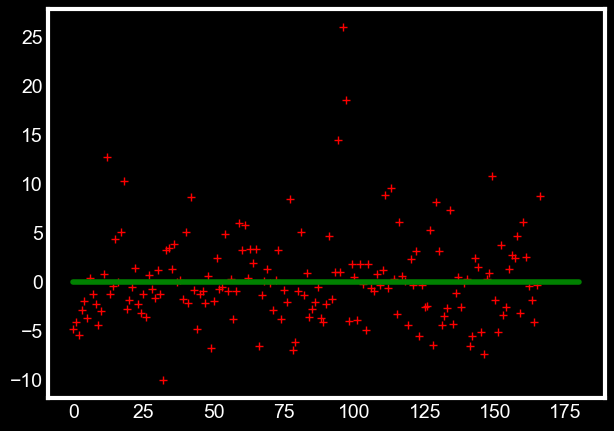

In [43]:
plt.style.use("dark_background")
plt.plot(np.arange(residuals.size), residuals, "r+")
sns.lineplot([0, 180], [0, 0], color='green')

#### Error Distribution

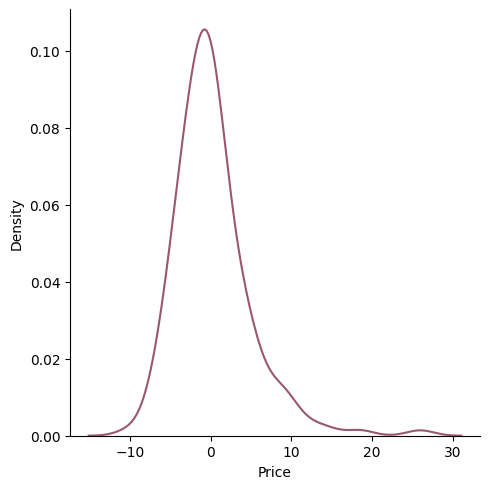

In [44]:
plt.style.use('default')
sns.displot(residuals, kind = "kde", color="#99596a")

<b>Result : </b> Error distribution is approximately normally distibuted with little right-skewed tail.

#### Realtion between predicted values & residuals

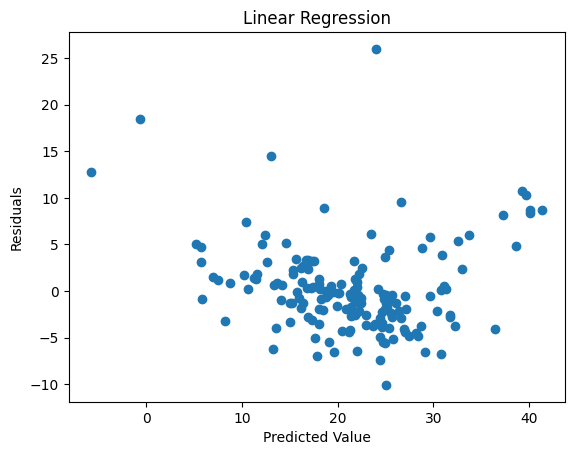

In [45]:
plt.xlabel("Predicted Value")
plt.ylabel("Residuals")
plt.title("Linear Regression")
plt.scatter(reg_pred, residuals)

#### Creation of temporary dataframe

In [46]:
temp_df = pd.DataFrame([residuals.to_list(), reg_pred.tolist()])
temp_df = temp_df.T
temp_df.rename(columns = {0:"Errors", 1:"Predicted Value"},inplace = True)

### Plotting Quantile-Quantile Graph

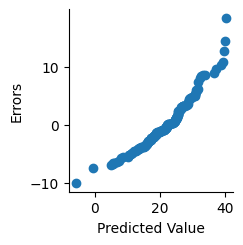

In [47]:
pplot(data = temp_df, x = "Predicted Value", y = "Errors", kind="qq")

<b>RESULT : </b>Approximate Uniform Distribution between Residuals & Predicted Values

### Performance Metric

#### Importing Libraries

In [48]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


#### Total Error Calculated for different Cost Functions

In [49]:
print(f"Mean Sqaured Error: {mean_squared_error(Y_test, reg_pred)}")
print(f"Mean Sqaured Error: {mean_absolute_error(Y_test, reg_pred)}")
print(f"Mean Sqaured Error: {np.sqrt(mean_squared_error(Y_test, reg_pred))}")


Mean Sqaured Error: 22.339013815006886
Mean Sqaured Error: 3.275010643648515
Mean Sqaured Error: 4.726416593467707


#### Calculation of R2 & Adjusted R2

In [50]:
r2 = r2_score(Y_test, reg_pred)
adjusted_r2 = 1 - ((1-r2)*(len(Y_test)-1)/(len(Y_test)-1-X.shape[1]))

print(f"R2 Score: {r2}")
print(f"Adjusted R2 Score: {adjusted_r2}")

R2 Score: 0.7048169381846415
Adjusted R2 Score: 0.6818156606405876


### Model Training Using Ridge Regression

### Importing Libraries

In [51]:
from sklearn.linear_model import Ridge

In [52]:
ridge_regression = Ridge()
ridge_regression

Ridge()

In [53]:
ridge_regression.fit(X_train, Y_train)

Ridge()

#### Coefficients & Intercept of Ridge Regression

In [54]:
ridge_regression.coef_

array([-0.69062437,  0.66221453,  0.01328714,  0.97337433, -1.63441186,
        2.96787292, -0.4725375 , -2.94776997,  0.32560195, -1.8748181 ,
        0.98093204, -3.85363594])

In [55]:
ridge_regression.intercept_

22.970796460176988

#### Prediction for the test-data

In [56]:
reg_pred_ridge = ridge_regression.predict(X_test)

In [57]:
reg_pred_ridge

array([28.37441779, 36.43582674, 19.05263672, 25.62994054, 18.06687151,
       23.69523048, 17.44050253, 15.29219653, 21.88899758, 21.18914263,
       24.44767278, 18.15019415, -5.68959958, 22.47589706, 18.96451643,
       25.38300062, 18.82546514,  5.1959655 , 39.68079819, 16.92238641,
       27.07561427, 29.59791629, 11.31006867, 24.62920471, 17.36549555,
       15.03269632, 23.83905776, 14.26183929, 22.46162215, 19.95891137,
       21.86311676, 25.0611695 , 25.06919467, 17.59221657, 15.65297204,
       18.13673458, 30.87603901, 19.59419596, 24.22467221, 25.15205761,
       14.59795719, 30.31347853, 41.28291444, 18.26058111, 27.39676384,
       16.3804267 , 14.12571021, 26.37768345, 19.32130158, 30.78156112,
       20.90069057, 33.00186772, 15.95579788, 26.98960867, 38.62597342,
       22.13953108, 18.16223376, 32.2633411 , 24.81005889, 12.5288791 ,
       21.7984193 , 29.67527026, 31.071926  , 16.92827518, 22.30502286,
       16.6794717 , 19.65937541, 26.11401278, 30.71430047, 11.46

#### Plotting predicted value vs real values

<AxesSubplot:title={'center':'Ridge Regression'}, xlabel='Predicted Values', ylabel='Observaed Values'>

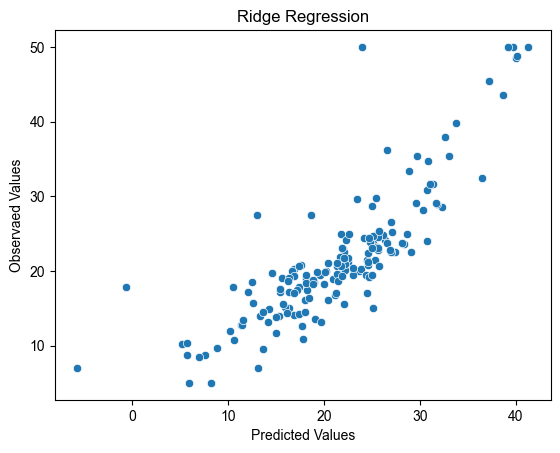

In [58]:
plt.xlabel("Predicted Values")
plt.ylabel("Observaed Values")
plt.title("Ridge Regression")
sns.set_style("whitegrid")
sns.scatterplot(x = reg_pred_ridge, y=Y_test, palette="plasma", ci=25)

<b>Result : </b>Almost Linear Relation between Predicted Values & Target Values.

### Calculating Erorr/Residuals

In [59]:
residuals_ridge = Y_test - reg_pred_ridge

#### Plotting Error

<AxesSubplot:>

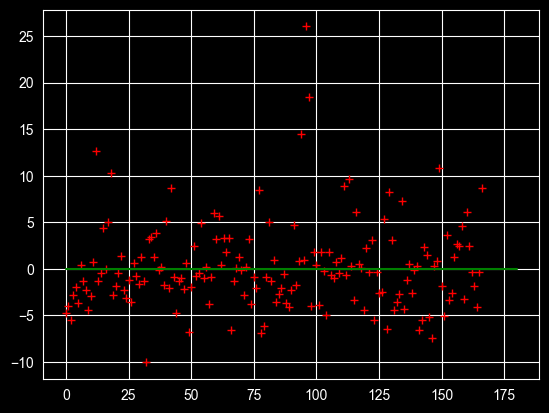

In [60]:
plt.style.use("dark_background")
plt.plot(np.arange(residuals_ridge.size), residuals_ridge, "r+")
sns.lineplot([0, 180], [0, 0], color='green')

#### Error Distribution

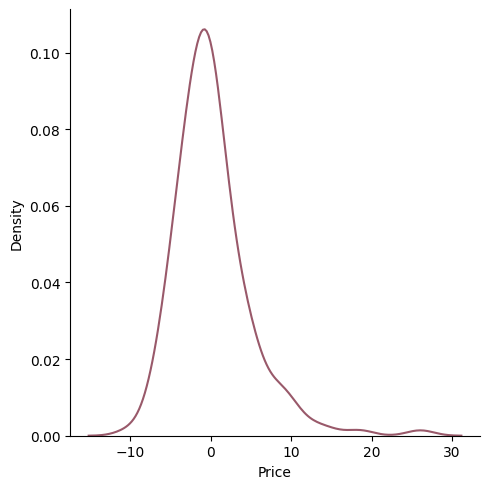

In [61]:
plt.style.use('default')
sns.displot(residuals_ridge, kind = "kde", color="#99596a")

<b>Result : </b> Error distribution is approximately normally distibuted with little right-skewed tail.

#### Realtion between predicted values & residuals

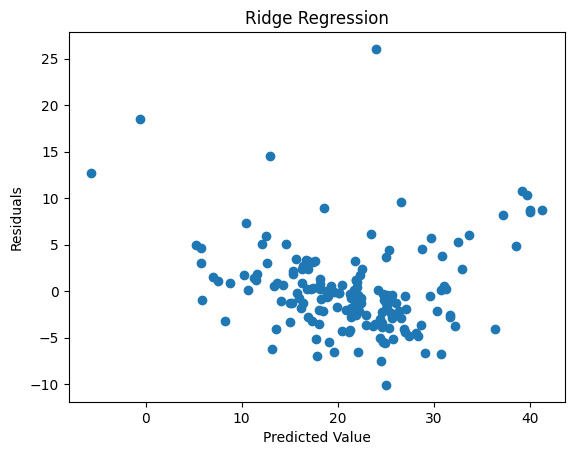

In [62]:
plt.xlabel("Predicted Value")
plt.ylabel("Residuals")
plt.title("Ridge Regression")
plt.scatter(reg_pred_ridge, residuals_ridge)

#### Creation of temporary dataframe

In [63]:
temp_df = pd.DataFrame([residuals_ridge.to_list(), reg_pred_ridge.tolist()])
temp_df = temp_df.T
temp_df.rename(columns = {0:"Errors", 1:"Predicted Value"},inplace = True)

### Plotting Quantile-Quantile Graph

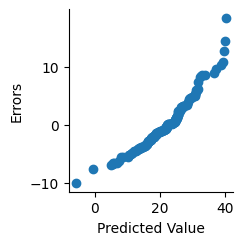

In [64]:
pplot(data = temp_df, x = "Predicted Value", y = "Errors", kind="qq")

<b>RESULT : </b>Approximate Linear Distribution between Residuals & Predicted Values

### Performance Metric

#### Total Error Calculated for different Cost Functions

In [65]:
print(f"Mean Sqaured Error: {mean_squared_error(Y_test, reg_pred_ridge)}")
print(f"Mean Sqaured Error: {mean_absolute_error(Y_test, reg_pred_ridge)}")
print(f"Mean Sqaured Error: {np.sqrt(mean_squared_error(Y_test, reg_pred_ridge))}")


Mean Sqaured Error: 22.32981472820066
Mean Sqaured Error: 3.270648366122255
Mean Sqaured Error: 4.725443336682883


#### Calculation of R2 & Adjusted R2

In [66]:
r2 = r2_score(Y_test, reg_pred_ridge)
adjusted_r2 = 1 - ((1-r2)*(len(Y_test)-1)/(len(Y_test)-1-X.shape[1]))

print(f"R2 Score: {r2}")
print(f"Adjusted R2 Score: {adjusted_r2}")

R2 Score: 0.7049384929959619
Adjusted R2 Score: 0.6819466872553874


### Model Training Using Lasso Regression

### Importing Libraries

In [67]:
from sklearn.linear_model import Lasso

In [68]:
lasso_regression = Lasso()
lasso_regression

Lasso()

In [69]:
lasso_regression.fit(X_train, Y_train)

Lasso()

#### Coefficients & Intercept of Lasso Regression

In [70]:
lasso_regression.coef_

array([-0.        ,  0.        , -0.        ,  0.27140288, -0.        ,
        2.62932086, -0.        , -0.        , -0.        , -1.21106795,
        0.29872592, -3.81788427])

In [71]:
lasso_regression.intercept_

22.970796460176988

#### Prediction for the test-data

In [72]:
reg_pred_lasso = lasso_regression.predict(X_test)

In [73]:
reg_pred_lasso

array([26.08015455, 30.74800639, 17.78164865, 25.25224746, 19.28387238,
       22.81161765, 18.31125159, 14.6359236 , 21.41277816, 20.44276657,
       20.78573705, 21.00978439,  1.291015  , 22.48591108, 20.42079939,
       24.7311525 , 18.16643037,  6.95747125, 35.82658712, 18.45664322,
       25.66618065, 26.77096267, 13.79601985, 24.00317028, 18.836776  ,
       15.53225582, 22.93568029, 18.81410942, 19.96419947, 19.71394574,
       19.99292728, 25.48086797, 25.07506372, 19.62299128, 15.87164423,
       20.47826682, 30.90020626, 21.73740749, 21.69357954, 24.78795178,
       14.48946285, 27.49872589, 36.28097532, 19.68302825, 25.54695917,
       17.26691105, 16.01035547, 25.87512545, 19.37058388, 29.52965179,
       23.10173703, 31.37342868, 17.55332683, 25.82107042, 34.98857122,
       22.9126753 , 19.39674982, 29.34678428, 24.65125374, 16.72971665,
       25.42537367, 30.67518447, 28.90511218, 18.42571757, 27.5642666 ,
       14.62706935, 20.02272704, 25.60745031, 28.32959641, 15.91

#### Plotting predicted value vs real values

<AxesSubplot:title={'center':'Lasso Regression'}, xlabel='Predicted Values', ylabel='Observaed Values'>

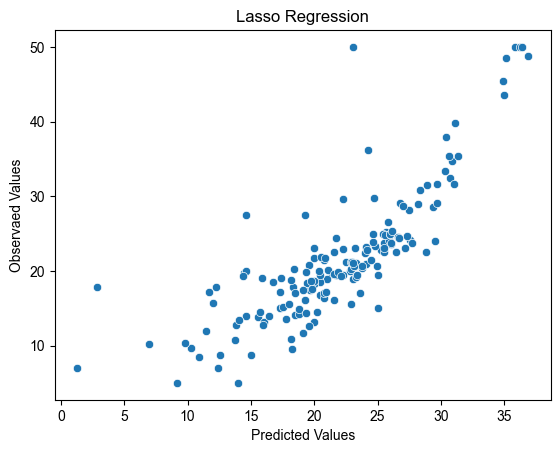

In [74]:
plt.xlabel("Predicted Values")
plt.ylabel("Observaed Values")
plt.title("Lasso Regression")
sns.set_style("whitegrid")
sns.scatterplot(x = reg_pred_lasso, y=Y_test, palette="plasma", ci=25)

<b>Result : </b>Almost Linear Relation between Predicted Values & Target Values.

### Calculating Erorr/Residuals

In [75]:
residuals_lasso = Y_test - reg_pred_lasso

#### Plotting Error

<AxesSubplot:>

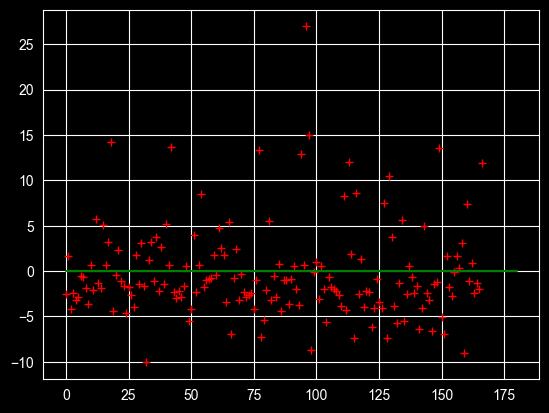

In [76]:
plt.style.use("dark_background")
plt.plot(np.arange(residuals_lasso.size), residuals_lasso, "r+")
sns.lineplot([0, 180], [0, 0], color='green')

#### Error Distribution

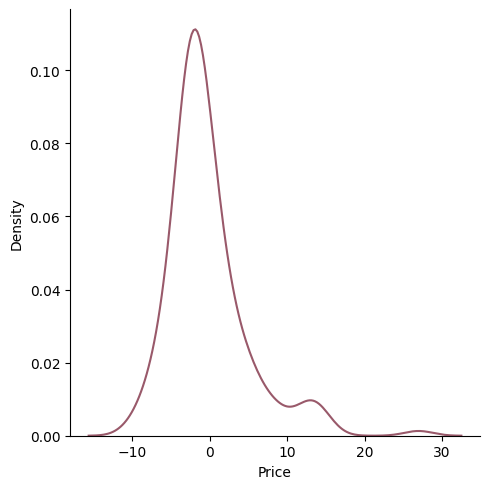

In [77]:
plt.style.use('default')
sns.displot(residuals_lasso, kind = "kde", color="#99596a")

<b>Result : </b> Error distribution is approximately normally distibuted with little right-skewed tail.

#### Realtion between predicted values & residuals

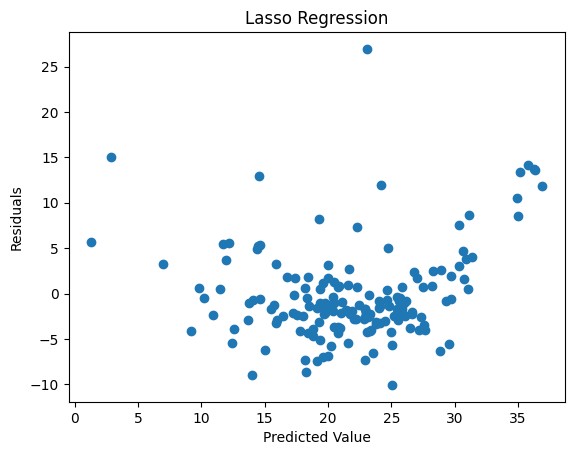

In [78]:
plt.xlabel("Predicted Value")
plt.ylabel("Residuals")
plt.title("Lasso Regression")
plt.scatter(reg_pred_lasso, residuals_lasso)

#### Creation of temporary dataframe

In [79]:
temp_df = pd.DataFrame([residuals_lasso.to_list(), reg_pred_lasso.tolist()])
temp_df = temp_df.T
temp_df.rename(columns = {0:"Errors", 1:"Predicted Value"},inplace = True)

### Plotting Quantile-Quantile Graph

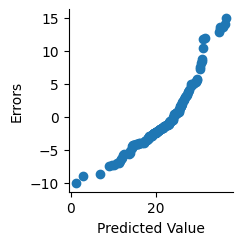

In [80]:
pplot(data = temp_df, x = "Predicted Value", y = "Errors", kind="qq")

<b>RESULT : </b>Approximate Linear Distribution between Residuals & Predicted Values

### Performance Metric

#### Total Error Calculated for different Cost Functions

In [81]:
print(f"Mean Sqaured Error: {mean_squared_error(Y_test, reg_pred_lasso)}")
print(f"Mean Sqaured Error: {mean_absolute_error(Y_test, reg_pred_lasso)}")
print(f"Mean Sqaured Error: {np.sqrt(mean_squared_error(Y_test, reg_pred_lasso))}")


Mean Sqaured Error: 26.166378490585732
Mean Sqaured Error: 3.646402767847218
Mean Sqaured Error: 5.115308249811123


#### Calculation of R2 & Adjusted R2

In [82]:
r2 = r2_score(Y_test, reg_pred_lasso)
adjusted_r2 = 1 - ((1-r2)*(len(Y_test)-1)/(len(Y_test)-1-X.shape[1]))

print(f"R2 Score: {r2}")
print(f"Adjusted R2 Score: {adjusted_r2}")

R2 Score: 0.6542429409179247
Adjusted R2 Score: 0.6273008324180227


### Model Training Using ElasticNet

### Importing Libraries

In [83]:
from sklearn.linear_model import ElasticNet

In [84]:
en_regression = ElasticNet()
en_regression

ElasticNet()

In [85]:
en_regression.fit(X_train, Y_train)

ElasticNet()

#### Coefficients & Intercept of Elastic Net

In [86]:
en_regression.coef_

array([-0.36520444,  0.        , -0.14337534,  0.63145886, -0.2519316 ,
        2.34999332, -0.        , -0.        , -0.25649587, -1.23951413,
        0.56384767, -2.56053065])

In [87]:
en_regression.intercept_

22.970796460176988

#### Prediction for the test-data

In [88]:
reg_pred_en = en_regression.predict(X_test)

In [89]:
reg_pred_en

array([26.04803111, 31.11448316, 18.09844331, 24.74715333, 19.13029595,
       23.07194954, 19.84921427, 16.42920945, 20.9828073 , 21.03041223,
       23.59247312, 22.40671604,  2.50341532, 22.86968815, 21.05836859,
       23.53088527, 19.32940329,  9.24659647, 34.51755335, 18.33111694,
       25.39963915, 26.53220578, 16.04213063, 23.68594856, 18.22309554,
       15.90700742, 22.91791394, 17.40136275, 22.8088184 , 20.34960421,
       21.28107928, 25.06647537, 23.2904073 , 18.52289617, 16.68946882,
       20.1709906 , 29.7800025 , 22.08911865, 24.00624595, 24.52109479,
       16.51540302, 27.2514299 , 34.89409579, 20.7523046 , 25.54944873,
       17.27877557, 17.51068539, 25.42247325, 19.45141707, 28.7244585 ,
       23.85816468, 30.64335485, 19.0577923 , 25.10137502, 33.43673403,
       21.9368308 , 19.10068193, 28.38705951, 24.91075888, 18.68821948,
       25.41736175, 29.96236683, 27.77368508, 18.6607811 , 26.83457792,
       18.72984705, 19.66634603, 25.37569807, 27.64863265, 15.09

#### Plotting predicted value vs real values

<AxesSubplot:title={'center':'ElasticNet'}, xlabel='Predicted Values', ylabel='Observaed Values'>

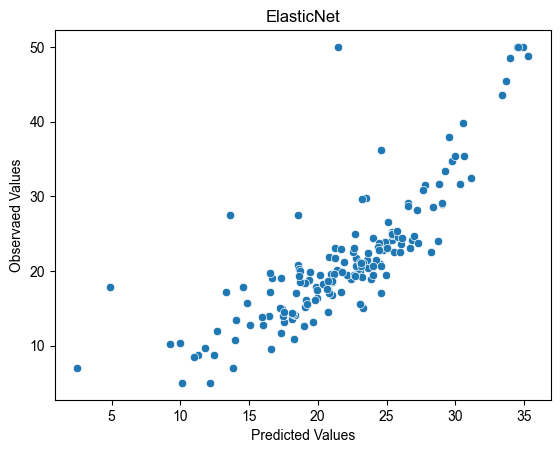

In [90]:
plt.xlabel("Predicted Values")
plt.ylabel("Observaed Values")
plt.title("ElasticNet")
sns.set_style("whitegrid")
sns.scatterplot(x = reg_pred_en, y=Y_test, palette="plasma", ci=25)

<b>Result : </b>Almost Linear Relation between Predicted Values & Target Values.

### Calculating Erorr/Residuals

In [91]:
residuals_en = Y_test - reg_pred_en

#### Plotting Error

<AxesSubplot:>

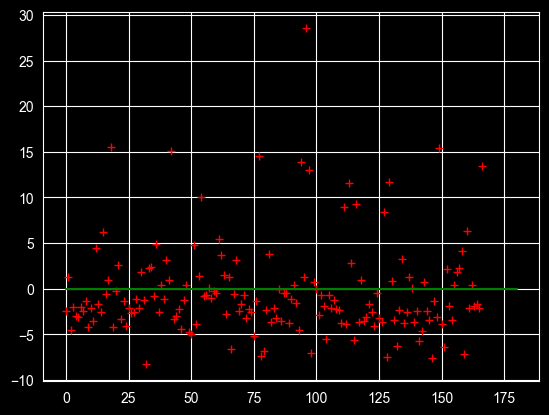

In [92]:
plt.style.use("dark_background")
plt.plot(np.arange(residuals_en.size), residuals_en, "r+")
sns.lineplot([0, 180], [0, 0], color='green')

#### Error Distribution

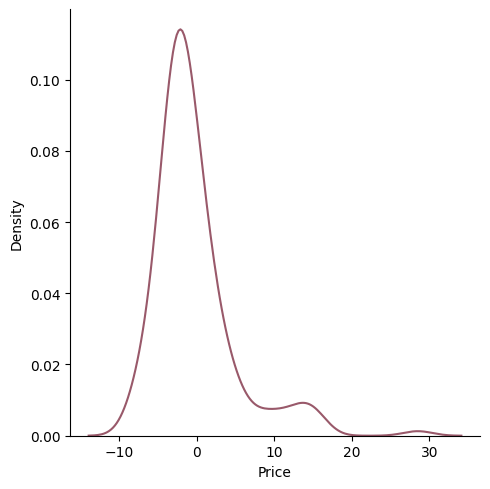

In [93]:
plt.style.use('default')
sns.displot(residuals_en, kind = "kde", color="#99596a")

<b>Result : </b> Error distribution is approximately normally distibuted with little right-skewed tail.

#### Realtion between predicted values & residuals

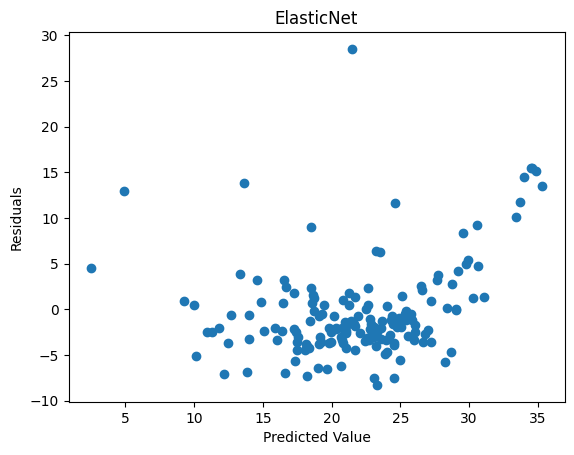

In [94]:
plt.xlabel("Predicted Value")
plt.ylabel("Residuals")
plt.title("ElasticNet")
plt.scatter(reg_pred_en, residuals_en)

#### Creation of temporary dataframe

In [95]:
temp_df = pd.DataFrame([residuals_lasso.to_list(), reg_pred_en.tolist()])
temp_df = temp_df.T
temp_df.rename(columns = {0:"Errors", 1:"Predicted Value"},inplace = True)

### Plotting Quantile-Quantile Graph

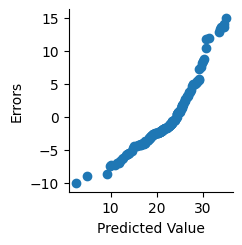

In [96]:
pplot(data = temp_df, x = "Predicted Value", y = "Errors", kind="qq")

<b>RESULT : </b>Approximate Linear Distribution between Residuals & Predicted Values

### Performance Metric

#### Total Error Calculated for different Cost Functions

In [97]:
print(f"Mean Sqaured Error: {mean_squared_error(Y_test, reg_pred_en)}")
print(f"Mean Sqaured Error: {mean_absolute_error(Y_test, reg_pred_en)}")
print(f"Mean Sqaured Error: {np.sqrt(mean_squared_error(Y_test, reg_pred_en))}")


Mean Sqaured Error: 27.140174496152532
Mean Sqaured Error: 3.62774535074285
Mean Sqaured Error: 5.209623258562228


#### Calculation of R2 & Adjusted R2

In [98]:
r2 = r2_score(Y_test, reg_pred_en)
adjusted_r2 = 1 - ((1-r2)*(len(Y_test)-1)/(len(Y_test)-1-X.shape[1]))

print(f"R2 Score: {r2}")
print(f"Adjusted R2 Score: {adjusted_r2}")

R2 Score: 0.6413754039314139
Adjusted R2 Score: 0.6134306302117838


<b>*Conclusion* : </b> As evident from R2 & Adjusted R2 metrics Ridge Regression Model has performed better as compared to other models. Hence this model will be recommended.